In [1]:
# Import all dependencies.
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, distinct,desc,and_
from sqlalchemy.sql.functions import coalesce
from datetime import datetime , timedelta,date
import time
import os
import json

from pandas.io.json import json_normalize
import warnings
warnings.filterwarnings('ignore')
import pymysql
pymysql.install_as_MySQLdb()
#from config import sqluser,sqlpassword,dbport,dburi,dbname


In [2]:
file_name=os.path.join("Resources","Usvideos.csv")
youtube_videodf=pd.read_csv(file_name)

In [3]:

youtube_videodf['trending_date'] = pd.to_datetime(youtube_videodf['trending_date'], format='%y.%d.%m')

youtube_videodf['publish_time'] = pd.to_datetime(youtube_videodf['publish_time']).apply(lambda x : x.date())

#youtube_videodf.isna().sum()

values = {'description':"No Description available"}
youtube_videodf= youtube_videodf.fillna(value=values)


youtube_videodf.isna().sum()

youtube_videodf=youtube_videodf[['video_id','trending_date','title', 'description','category_id','publish_time','views','comment_count','likes','dislikes']]
youtube_videodf

,video_id,trending_date,title,description,category_id,publish_time,views,comment_count,likes,dislikes
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,2017-11-13,748374,15954,57527,2966
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,"One year after the presidential election, John...",24,2017-11-13,2418783,12703,97185,6146
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,23,2017-11-12,3191434,8181,146033,5339
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Today we find out if Link is a Nickelback amat...,24,2017-11-13,343168,2146,10172,666
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,I know it's been a while since we did this sho...,24,2017-11-12,2095731,17518,132235,1989
5,gHZ1Qz0KiKM,2017-11-14,2 Weeks with iPhone X,Using the iPhone for the past two weeks -- her...,28,2017-11-13,119180,1434,9763,511
6,39idVpFF7NQ,2017-11-14,Roy Moore & Jeff Sessions Cold Open - SNL,Embattled Alabama Senate candidate Roy Moore (...,24,2017-11-12,2103417,1970,15993,2445
7,nc99ccSXST0,2017-11-14,5 Ice Cream Gadgets put to the Test,Ice Cream Pint Combination Lock - http://amzn....,28,2017-11-12,817732,3432,23663,778
8,jr9QtXwC9vc,2017-11-14,The Greatest Showman | Official Trailer 2 [HD]...,"Inspired by the imagination of P.T. Barnum, Th...",1,2017-11-13,826059,340,3543,119
9,TUmyygCMMGA,2017-11-14,Why the rise of the robots won’t mean the end ...,"For now, at least, we have better things to wo...",25,2017-11-13,256426,2368,12654,1363


In [4]:
filename=os.path.join("Resources",'US_category_id.json')
with open(filename) as f:
    d = json.load(f)


In [5]:
items_data = json_normalize(d, 'items',errors='ignore')
#items_data
items_data_final=pd.concat([items_data.drop('snippet', axis=1), pd.DataFrame(items_data['snippet'].tolist())], axis=1)
#items_data_final.to_csv("C:/users/lalit/Beautifulsoup/youtube/ca.csv")

items_data_final= items_data_final.rename(columns={'id':'category_id','title':'category'})
items_data_final['category_id']=items_data_final['category_id'].apply(pd.to_numeric)

items_data_final=items_data_final[['category_id','category']].copy()
items_data_final.set_index('category_id', inplace=True)
items_data_final


,category
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging


In [6]:

#engine = create_engine(f"mysql://{sqluser}:{sqlpassword}@{dburi}:{dbport}/{dbname}")
#items_data_final.to_sql(name='youtube_category', con=engine, if_exists='append', index=True)

In [7]:
Youtube_merged_df=pd.merge(youtube_videodf,items_data_final, how='inner', on=['category_id'] )
Youtube_merged_df.isna().sum()

Youtube_merged_df

,video_id,trending_date,title,description,category_id,publish_time,views,comment_count,likes,dislikes,category
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,2017-11-13,748374,15954,57527,2966,People & Blogs
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Kittens come out of the eggs in a Thai commerc...,22,2017-04-21,98966,532,2486,184,People & Blogs
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Subscribe for weekly videos ▶ http://bit.ly/sj...,22,2017-11-11,321053,895,4451,1772,People & Blogs
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Molly is an god damn amazing human and she cha...,22,2017-11-11,197062,456,7250,217,People & Blogs
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,I found this online dollar store called ShopMi...,22,2017-11-11,2744430,6541,115426,1110,People & Blogs
5,pa_oUisZZy0,2017-11-14,Mark Ruffalo Reads Hilarious Thirst Tweets,I'm just...I'm flattered.\n\nCredits: https://...,22,2017-11-11,177707,275,6271,88,People & Blogs
6,fCTKDn3Q8xQ,2017-11-14,Idiot's Guide to Japanese Squat Toilets,Our jewelry collection! https://motif.me/rache...,22,2017-11-09,1098897,4702,43875,1326,People & Blogs
7,_dhneCO4YEE,2017-11-14,"Russian Bots and Trolls | November 8, 2017 Act...","For the low, low price of $200, you too can co...",22,2017-11-09,362009,1264,5505,2356,People & Blogs
8,EYkEshCOhEU,2017-11-14,The Ultimate Red Lip Look | Nicole Guerriero,To see the power of this lip watch my One Chip...,22,2017-11-10,294387,976,15247,385,People & Blogs
9,Eg_kW5fw6qU,2017-11-14,Could Anastasia Become A Disney Princess?,"Special Thanks to these Patreons :: Abi Solk, ...",22,2017-11-09,188003,2814,9091,135,People & Blogs


In [8]:
#videos_with_most_views=Youtube_merged_df.sort_values(by=["views"],ascending=False)
#videos_with_most_views.head(n=10)

In [9]:
#views_by_category_total = Youtube_merged_df.groupby('category')['views'].sum().sort_values(ascending=False)
#comments_by_category_total = Youtube_merged_df.groupby('category')['comment_count'].sum().sort_values(ascending=False)
#views_by_category_total

In [10]:
views_by_category_total = Youtube_merged_df.groupby('category')['views'].sum().to_frame()
comments_by_category_total = Youtube_merged_df.groupby('category')['comment_count'].sum().to_frame()
likes_by_category_total= Youtube_merged_df.groupby('category')['likes'].sum().to_frame()
dislikes_by_category_total=Youtube_merged_df.groupby('category')['dislikes'].sum().to_frame()

In [11]:
video_analysis_df1=pd.merge(views_by_category_total,comments_by_category_total, how='inner' , on =['category'])
video_analysis_df2=pd.merge(video_analysis_df1,likes_by_category_total, how='inner',on=['category'])


In [12]:
video_analysis_final=pd.merge(video_analysis_df2,dislikes_by_category_total,how='inner',on=['category'])

In [13]:
video_analysis_final

,views,comment_count,likes,dislikes
category,,,,
Autos & Vehicles,520690717,784447,4245656,243010
Comedy,5117426208,22545582,216346746,7230391
Education,1180629990,5442242,49257772,1351972
Entertainment,20604388195,73566498,530516491,42987663
Film & Animation,7284156721,17887060,165997476,6075148
Gaming,2141218625,14740713,69038284,9184466
Howto & Style,4078545064,23149550,162880075,5473899
Music,40132892190,125296396,1416838584,51179008
News & Politics,1473765704,6039433,18151033,4180049


In [14]:
video_analysis_final['Comment/views']=video_analysis_final['views']/video_analysis_final['comment_count']
video_analysis_final['likes/views']=video_analysis_final['views']/video_analysis_final['likes']
video_analysis_final['dislikes/views']=video_analysis_final['views']/video_analysis_final['dislikes']
video_analysis_final

,views,comment_count,likes,dislikes,Comment/views,likes/views,dislikes/views
category,,,,,,,
Autos & Vehicles,520690717,784447,4245656,243010,663.767873,122.640816,2142.671976
Comedy,5117426208,22545582,216346746,7230391,226.981331,23.653816,707.766179
Education,1180629990,5442242,49257772,1351972,216.938164,23.968400,873.265119
Entertainment,20604388195,73566498,530516491,42987663,280.078416,38.838356,479.309336
Film & Animation,7284156721,17887060,165997476,6075148,407.230519,43.881129,1199.008933
Gaming,2141218625,14740713,69038284,9184466,145.258823,31.014946,233.134798
Howto & Style,4078545064,23149550,162880075,5473899,176.182477,25.040172,745.089572
Music,40132892190,125296396,1416838584,51179008,320.303644,28.325663,784.167059
News & Politics,1473765704,6039433,18151033,4180049,244.023852,81.194591,352.571394


In [34]:
bar_analysis_df = video_analysis_final[['Comment/views', 'likes/views', 'dislikes/views']].copy()
bar_analysis_df.head()

,Comment/views,likes/views,dislikes/views
category,,,
Autos & Vehicles,663.767873,122.640816,2142.671976
Comedy,226.981331,23.653816,707.766179
Education,216.938164,23.968400,873.265119
Entertainment,280.078416,38.838356,479.309336
Film & Animation,407.230519,43.881129,1199.008933


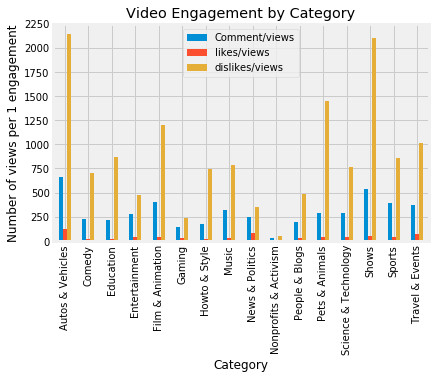

<Figure size 432x288 with 0 Axes>

In [39]:
bar_chart = bar_analysis_df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
bar_chart.set_xlabel("Category")
bar_chart.set_ylabel("Number of views per 1 engagement")
bar_chart.set_title("Video Engagement by Category")


plt.show()
plt.savefig("BarGraph.png")

In [40]:
pie_analysis_df = video_analysis_final[['views']].copy()
pie_analysis_df.head()

,views
category,
Autos & Vehicles,520690717
Comedy,5117426208
Education,1180629990
Entertainment,20604388195
Film & Animation,7284156721


([<matplotlib.patches.Wedge at 0x116026a90>,
 [Text(1.09984,0.0186124,''),
  Text(1.07804,0.218694,''),
  Text(1.01109,0.433236,''),
  Text(0.48639,0.986623,''),
  Text(-0.476766,0.991309,''),
  Text(-0.753489,0.801408,''),
  Text(-0.899034,0.633827,''),
  Text(-0.748283,-0.80627,''),
  Text(0.624732,-0.905378,''),
  Text(0.672152,-0.870753,''),
  Text(0.806261,-0.748294,''),
  Text(0.929941,-0.587545,''),
  Text(1.00201,-0.453841,''),
  Text(1.04748,-0.335848,''),
  Text(1.08498,-0.18118,''),
  Text(1.09993,-0.0122807,'')])

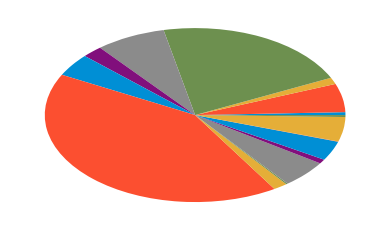

In [41]:
plt.pie(pie_analysis_df)